### 정규성, 등분산성 확인

In [149]:
# 정규성
import numpy as np
import scipy as sp
from scipy import stats
from scipy.stats import kstest, norm, shapiro, jarque_bera, bartlett, fligner, levene
import pandas as pd
import seaborn as sns

In [75]:
from scipy.stats import kstest,norm

data = norm.rvs(size = 1000)
kstest(data, 'norm')

KstestResult(statistic=0.01686233894525574, pvalue=0.9340007574542049)

In [88]:
from scipy.stats import norm, shapiro

data = norm.rvs(size=40)
shapiro(data)

ShapiroResult(statistic=0.9748116135597229, pvalue=0.5036677718162537)

In [89]:
data

array([ 1.30560827,  1.49915449, -1.40220382,  0.73756042,  0.43399908,
       -0.88294512,  1.22444993, -0.24063786,  0.03295534, -1.14588942,
       -0.13907971,  0.75519763,  1.39717787,  0.85624309,  0.25932696,
       -1.28570288, -2.68217514, -0.52537156,  0.45552515, -0.40015443,
       -0.39077411,  0.11127161,  0.12865221,  0.1679172 , -1.52752322,
        0.2818852 , -0.88713038, -0.02489156, -0.42570102,  0.22245221,
        1.39402092, -0.35136532,  0.34055795, -1.22389631, -0.76958274,
        0.225733  , -2.05501775, -1.33306247, -0.50478065,  0.15334381])

In [42]:
# 등분산성
from scipy.stats import bartlett, fligner, levene

data = np.arange(1,100,10)
data2 = np.arange(1,100,12)

print(bartlett(data,data2))
print(fligner(data,data2))
print(levene(data,data2))

BartlettResult(statistic=0.05387296931411971, pvalue=0.8164560627928433)
FlignerResult(statistic=0.271365492595865, pvalue=0.6024172558183811)
LeveneResult(statistic=0.05275571002979154, pvalue=0.8210765257077993)


### 단일표본 t검정

In [69]:
# 일표본 t-검정
import numpy as np
import scipy as sp
from scipy import stats
one_sample = [170.0, 180.0, 188.7, 173.7, 175.3]

result1 = stats.ttest_1samp(one_sample,popmean = 160)
result2 = stats.ttest_1samp(one_sample,popmean= 177.54)

print(np.mean(one_sample))
print(result1)
print(result2)



177.54000000000002
Ttest_1sampResult(statistic=5.4492550531541735, pvalue=0.005509200401916088)
Ttest_1sampResult(statistic=8.82993977952728e-15, pvalue=0.9999999999999933)


### wilcoxon(단일표본)

In [193]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/wjddyd66/R/master/Data/babyboom.csv")
print(data.head())
girl_data = data[data['gender']==1]
print(girl_data[['weight']].describe())

   time  gender  weight  minutes
0     5       1    3837        5
1   104       1    3334       64
2   118       2    3554       78
3   155       2    3838      115
4   257       2    3625      177
            weight
count    18.000000
mean   3132.444444
std     631.582534
min    1745.000000
25%    2711.000000
50%    3381.000000
75%    3517.250000
max    3866.000000


In [194]:
from scipy.stats import shapiro

shapiro(girl_data['weight'])

ShapiroResult(statistic=0.8702831864356995, pvalue=0.017984945327043533)

C:\Users\rbtkd\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='weight', ylabel='Density'>

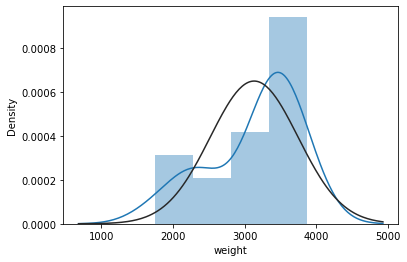

In [195]:
sns.distplot(girl_data.loc[:,'weight'], fit = stats.norm)

In [209]:
from scipy.stats import wilcoxon

print(wilcoxon(girl_data['weight']-3381))
print(wilcoxon(girl_data['weight']-2000))

WilcoxonResult(statistic=65.5, pvalue=0.39273834228515625)
WilcoxonResult(statistic=3.0, pvalue=3.814697265625e-05)


### 독립표본 t검정

In [217]:
male = [75, 85, 100, 72.5, 86.5]
female = [63.2, 76, 52, 100, 70]
print(shapiro(male))
print(shapiro(female))
print(bartlett(male,female))

ShapiroResult(statistic=0.9305859208106995, pvalue=0.6003715991973877)
ShapiroResult(statistic=0.9557387828826904, pvalue=0.7780438661575317)
BartlettResult(statistic=0.8369187644316614, pvalue=0.3602794952403162)


In [218]:
from scipy.stats import ttest_ind

two_samples = stats.ttest_ind(male, female)
print(np.mean(male))
print(np.mean(female))
print(two_samples)

83.8
72.24
Ttest_indResult(statistic=1.233193127514512, pvalue=0.2525076844853278)


### Mann Whitney (독립표본)

In [225]:
male = [75, 85, 150, 72.5, 86.5]
female = [63.2, 76, 52, 60, 62]
print(shapiro(male))
print(shapiro(female))
print(bartlett(male,female))

ShapiroResult(statistic=0.7194008231163025, pvalue=0.01511599775403738)
ShapiroResult(statistic=0.9341663122177124, pvalue=0.6250438690185547)
BartlettResult(statistic=4.874215039584082, pvalue=0.02726083685972358)


In [223]:
from scipy.stats import mannwhitneyu

print(np.percentile(male,50))
print(np.percentile(female,50))
mannwhitneyu(male, female)

85.0
62.0


MannwhitneyuResult(statistic=2.0, pvalue=0.01835692818135205)

### 대응표본 t-검정

In [235]:
baseline = [67.2, 67.4, 71.5, 77.6, 86.0, 89.1, 59.5, 81.9, 105.5]
follow_up = [62.4, 64.6, 70.4, 62.6, 80.1, 73.2, 58.2, 71.0, 101.0]
print(shapiro(baseline))
print(shapiro(follow_up))


ShapiroResult(statistic=0.9611198306083679, pvalue=0.809967577457428)
ShapiroResult(statistic=0.8478229641914368, pvalue=0.0705145075917244)


In [234]:
from scipy.stats import ttest_rel
paired_result = stats.ttest_rel(baseline, follow_up)
print(np.mean(baseline))
print(np.mean(follow_up))
print(paired_result)

78.41111111111111
78.1888888888889
Ttest_relResult(statistic=1.0, pvalue=0.34659350708733416)


### wilcoxon(대응표본)

In [236]:
from scipy.stats import wilcoxon

wilcoxon(baseline, y=follow_up)

WilcoxonResult(statistic=0.0, pvalue=0.00390625)

### ANOVA

In [48]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/wjddyd66/R/master/Data/three_sample.csv")
print(data.head())
print(len(data)) # 80
print(data.describe())

   no  method  survey  score
0   1       1       1     72
1   2       3       1     87
2   3       2       1     78
3   4       1       1     54
4   5       2       0     84
80
            no     method     survey       score
count  80.0000  80.000000  80.000000   80.000000
mean   40.5000   1.962500   0.650000   78.212500
std    23.2379   0.802587   0.479979   64.886404
min     1.0000   1.000000   0.000000   33.000000
25%    20.7500   1.000000   0.000000   58.000000
50%    40.5000   2.000000   1.000000   65.000000
75%    60.2500   3.000000   1.000000   79.500000
max    80.0000   3.000000   1.000000  500.000000


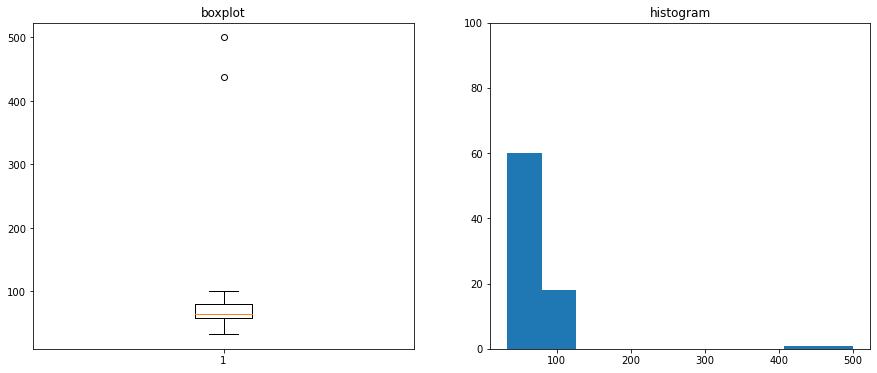

In [49]:
# 이상치 확인
f, ax = plt.subplots(1,2, figsize = (15,6))
ax[0].boxplot(data.score)
ax[0].set_title('boxplot')
ax[1].hist(data.score)
ax[1].set_ylim(0,100)
ax[1].set_title('histogram')
plt.show()

78


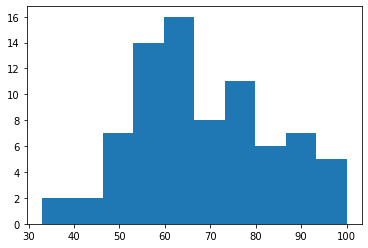

In [50]:
# 이상치 제거 후 정규성 확인
data = data.query("score <= 100")
print(len(data))
plt.hist(data.score)
plt.show()

In [51]:
from scipy.stats import shapiro 
print(shapiro(data.score))

ShapiroResult(statistic=0.9810646176338196, pvalue=0.2986918091773987)


In [56]:
from scipy.stats import bartlett, levene

data_method1 = np.array(data[data['method']==1].score)
data_method2 = np.array(data[data['method']==2].score)
data_method3 = np.array(data[data['method']==3].score)

bartlett(data_method1,data_method2,data_method3)

BartlettResult(statistic=3.760993476436484, pvalue=0.15251432724222921)

In [58]:
print(np.mean(data[data['method']==1].score))
print(np.mean(data[data['method']==2].score))
print(np.mean(data[data['method']==3].score))

67.38461538461539
68.35714285714286
68.875


In [64]:
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

reg = ols("data['score']~ C(data['method'])",data = data).fit()

result = anova_lm(reg)
print(result)
print()
print(np.mean(data[data['method']==1].score))
print(np.mean(data[data['method']==2].score))
print(np.mean(data[data['method']==3].score))

                     df        sum_sq     mean_sq         F    PR(>F)
C(data['method'])   2.0     28.907967   14.453984  0.062312  0.939639
Residual           75.0  17397.207418  231.962766       NaN       NaN

67.38461538461539
68.35714285714286
68.875


In [77]:
mtcars = pd.read_csv('https://t1.daumcdn.net/cfile/blog/99F8633E5E8ECB130D?download' ,index_col=0)

mtcars_sam = mtcars.loc[:,['cyl','am','mpg']]
mtcars_sam.head()

,cyl,am,mpg
Mazda RX4,6,1,21.0
Mazda RX4 Wag,6,1,21.0
Datsun 710,4,1,22.8
Hornet 4 Drive,6,0,21.4
Hornet Sportabout,8,0,18.7


In [79]:
#이원배치 분산분석
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

formula = 'mpg~ C(cyl) + C(am) + C(cyl):C(am)'
lm = ols(formula, data=mtcars_sam).fit()
print(anova_lm(lm))

                df      sum_sq     mean_sq          F        PR(>F)
C(cyl)         2.0  824.784590  412.392295  44.851657  3.725274e-09
C(am)          1.0   36.766919   36.766919   3.998759  5.608373e-02
C(cyl):C(am)   2.0   25.436511   12.718256   1.383233  2.686140e-01
Residual      26.0  239.059167    9.194583        NaN           NaN


In [98]:
# 사후검정

url = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/altman_910.txt'
data = pd.read_csv(url, header=None)

df = pd.DataFrame(data)
df.columns = ['value', 'treatment']
print(df)
print()

from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(df['value'], df['treatment'], alpha=0.05)

print(posthoc)



    value  treatment
0     243          1
1     251          1
2     275          1
3     291          1
4     347          1
5     354          1
6     380          1
7     392          1
8     206          2
9     210          2
10    226          2
11    249          2
12    255          2
13    273          2
14    285          2
15    295          2
16    309          2
17    241          3
18    258          3
19    270          3
20    293          3
21    328          3

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper  reject
------------------------------------------------------
     1      2 -60.1806 0.0354 -116.6056 -3.7555   True
     1      3  -38.625 0.3217 -104.8246 27.5746  False
     2      3  21.5556 0.6706  -43.2141 86.3252  False
------------------------------------------------------


In [103]:
# 이항검정

from scipy.stats import binom_test
pval = binom_test(520, n=1000, p=0.5)
print(pval)

0.21744829320424017


In [107]:
# 비모수검정 (3개이상 변수)
from scipy.stats import kruskal
url = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/altman_910.txt'
data = pd.read_csv(url, delimiter=',', header=None)

print(data)
print()
# Sort them into groups, according to column 1
group1 = data[data[1]==1]
group2 = data[data[1]==2]
group3 = data[data[1]==3]

print(np.median(group1))
print(np.median(group2))
print(np.median(group3))

kruskal(group1, group2, group3)



      0  1
0   243  1
1   251  1
2   275  1
3   291  1
4   347  1
5   354  1
6   380  1
7   392  1
8   206  2
9   210  2
10  226  2
11  249  2
12  255  2
13  273  2
14  285  2
15  295  2
16  309  2
17  241  3
18  258  3
19  270  3
20  293  3
21  328  3

122.0
104.0
122.0


KruskalResult(statistic=148.8656364213711, pvalue=4.723215691129366e-33)